In [81]:
import pandas as pd
import numpy as np

In [82]:
# Load the data
file = 'C:/Users/Lajpat Rai/Desktop/Ryseron Data Science Diploma/CIND820 Project/data.csv'
df = pd.read_csv(file)
df.head() # let' see first 5 rows

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX
0,4.5878,1018.7,83.675,3.5758,23.979,1086.2,549.83,134.67,11.898,0.32663,81.952
1,4.2932,1018.3,84.235,3.5709,23.951,1086.1,550.05,134.67,11.892,0.44784,82.377
2,3.9045,1018.4,84.858,3.5828,23.990,1086.5,550.19,135.10,12.042,0.45144,83.776
3,3.7436,1018.3,85.434,3.5808,23.911,1086.5,550.17,135.03,11.990,0.23107,82.505
4,3.7516,1017.8,85.182,3.5781,23.917,1085.9,550.00,134.67,11.910,0.26747,82.028


# 1. Data Cleaning

In [83]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36733 entries, 0 to 36732
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AT      36733 non-null  float64
 1   AP      36733 non-null  float64
 2   AH      36733 non-null  float64
 3   AFDP    36733 non-null  float64
 4   GTEP    36733 non-null  float64
 5   TIT     36733 non-null  float64
 6   TAT     36733 non-null  float64
 7   TEY     36733 non-null  float64
 8   CDP     36733 non-null  float64
 9   CO      36733 non-null  float64
 10  NOX     36733 non-null  float64
dtypes: float64(11)
memory usage: 3.1 MB


In [84]:
# identify missing data
missing_data = df.isnull()
# Using a for loop in Python, the method ".value_counts()" counts the number of "True" values.
for column in missing_data.columns.values.tolist():
    print(column)
    print (missing_data[column].value_counts())
    print("")

AT
False    36733
Name: AT, dtype: int64

AP
False    36733
Name: AP, dtype: int64

AH
False    36733
Name: AH, dtype: int64

AFDP
False    36733
Name: AFDP, dtype: int64

GTEP
False    36733
Name: GTEP, dtype: int64

TIT
False    36733
Name: TIT, dtype: int64

TAT
False    36733
Name: TAT, dtype: int64

TEY
False    36733
Name: TEY, dtype: int64

CDP
False    36733
Name: CDP, dtype: int64

CO
False    36733
Name: CO, dtype: int64

NOX
False    36733
Name: NOX, dtype: int64



In [85]:
# print the summary
print(df.describe())

                 AT            AP            AH          AFDP          GTEP  \
count  36733.000000  36733.000000  36733.000000  36733.000000  36733.000000   
mean      17.712726   1013.070165     77.867015      3.925518     25.563801   
std        7.447451      6.463346     14.461355      0.773936      4.195957   
min       -6.234800    985.850000     24.085000      2.087400     17.698000   
25%       11.781000   1008.800000     68.188000      3.355600     23.129000   
50%       17.801000   1012.600000     80.470000      3.937700     25.104000   
75%       23.665000   1017.000000     89.376000      4.376900     29.061000   
max       37.103000   1036.600000    100.200000      7.610600     40.716000   

                TIT           TAT           TEY           CDP            CO  \
count  36733.000000  36733.000000  36733.000000  36733.000000  36733.000000   
mean    1081.428084    546.158517    133.506404     12.060525      2.372468   
std       17.536373      6.842360     15.618634    

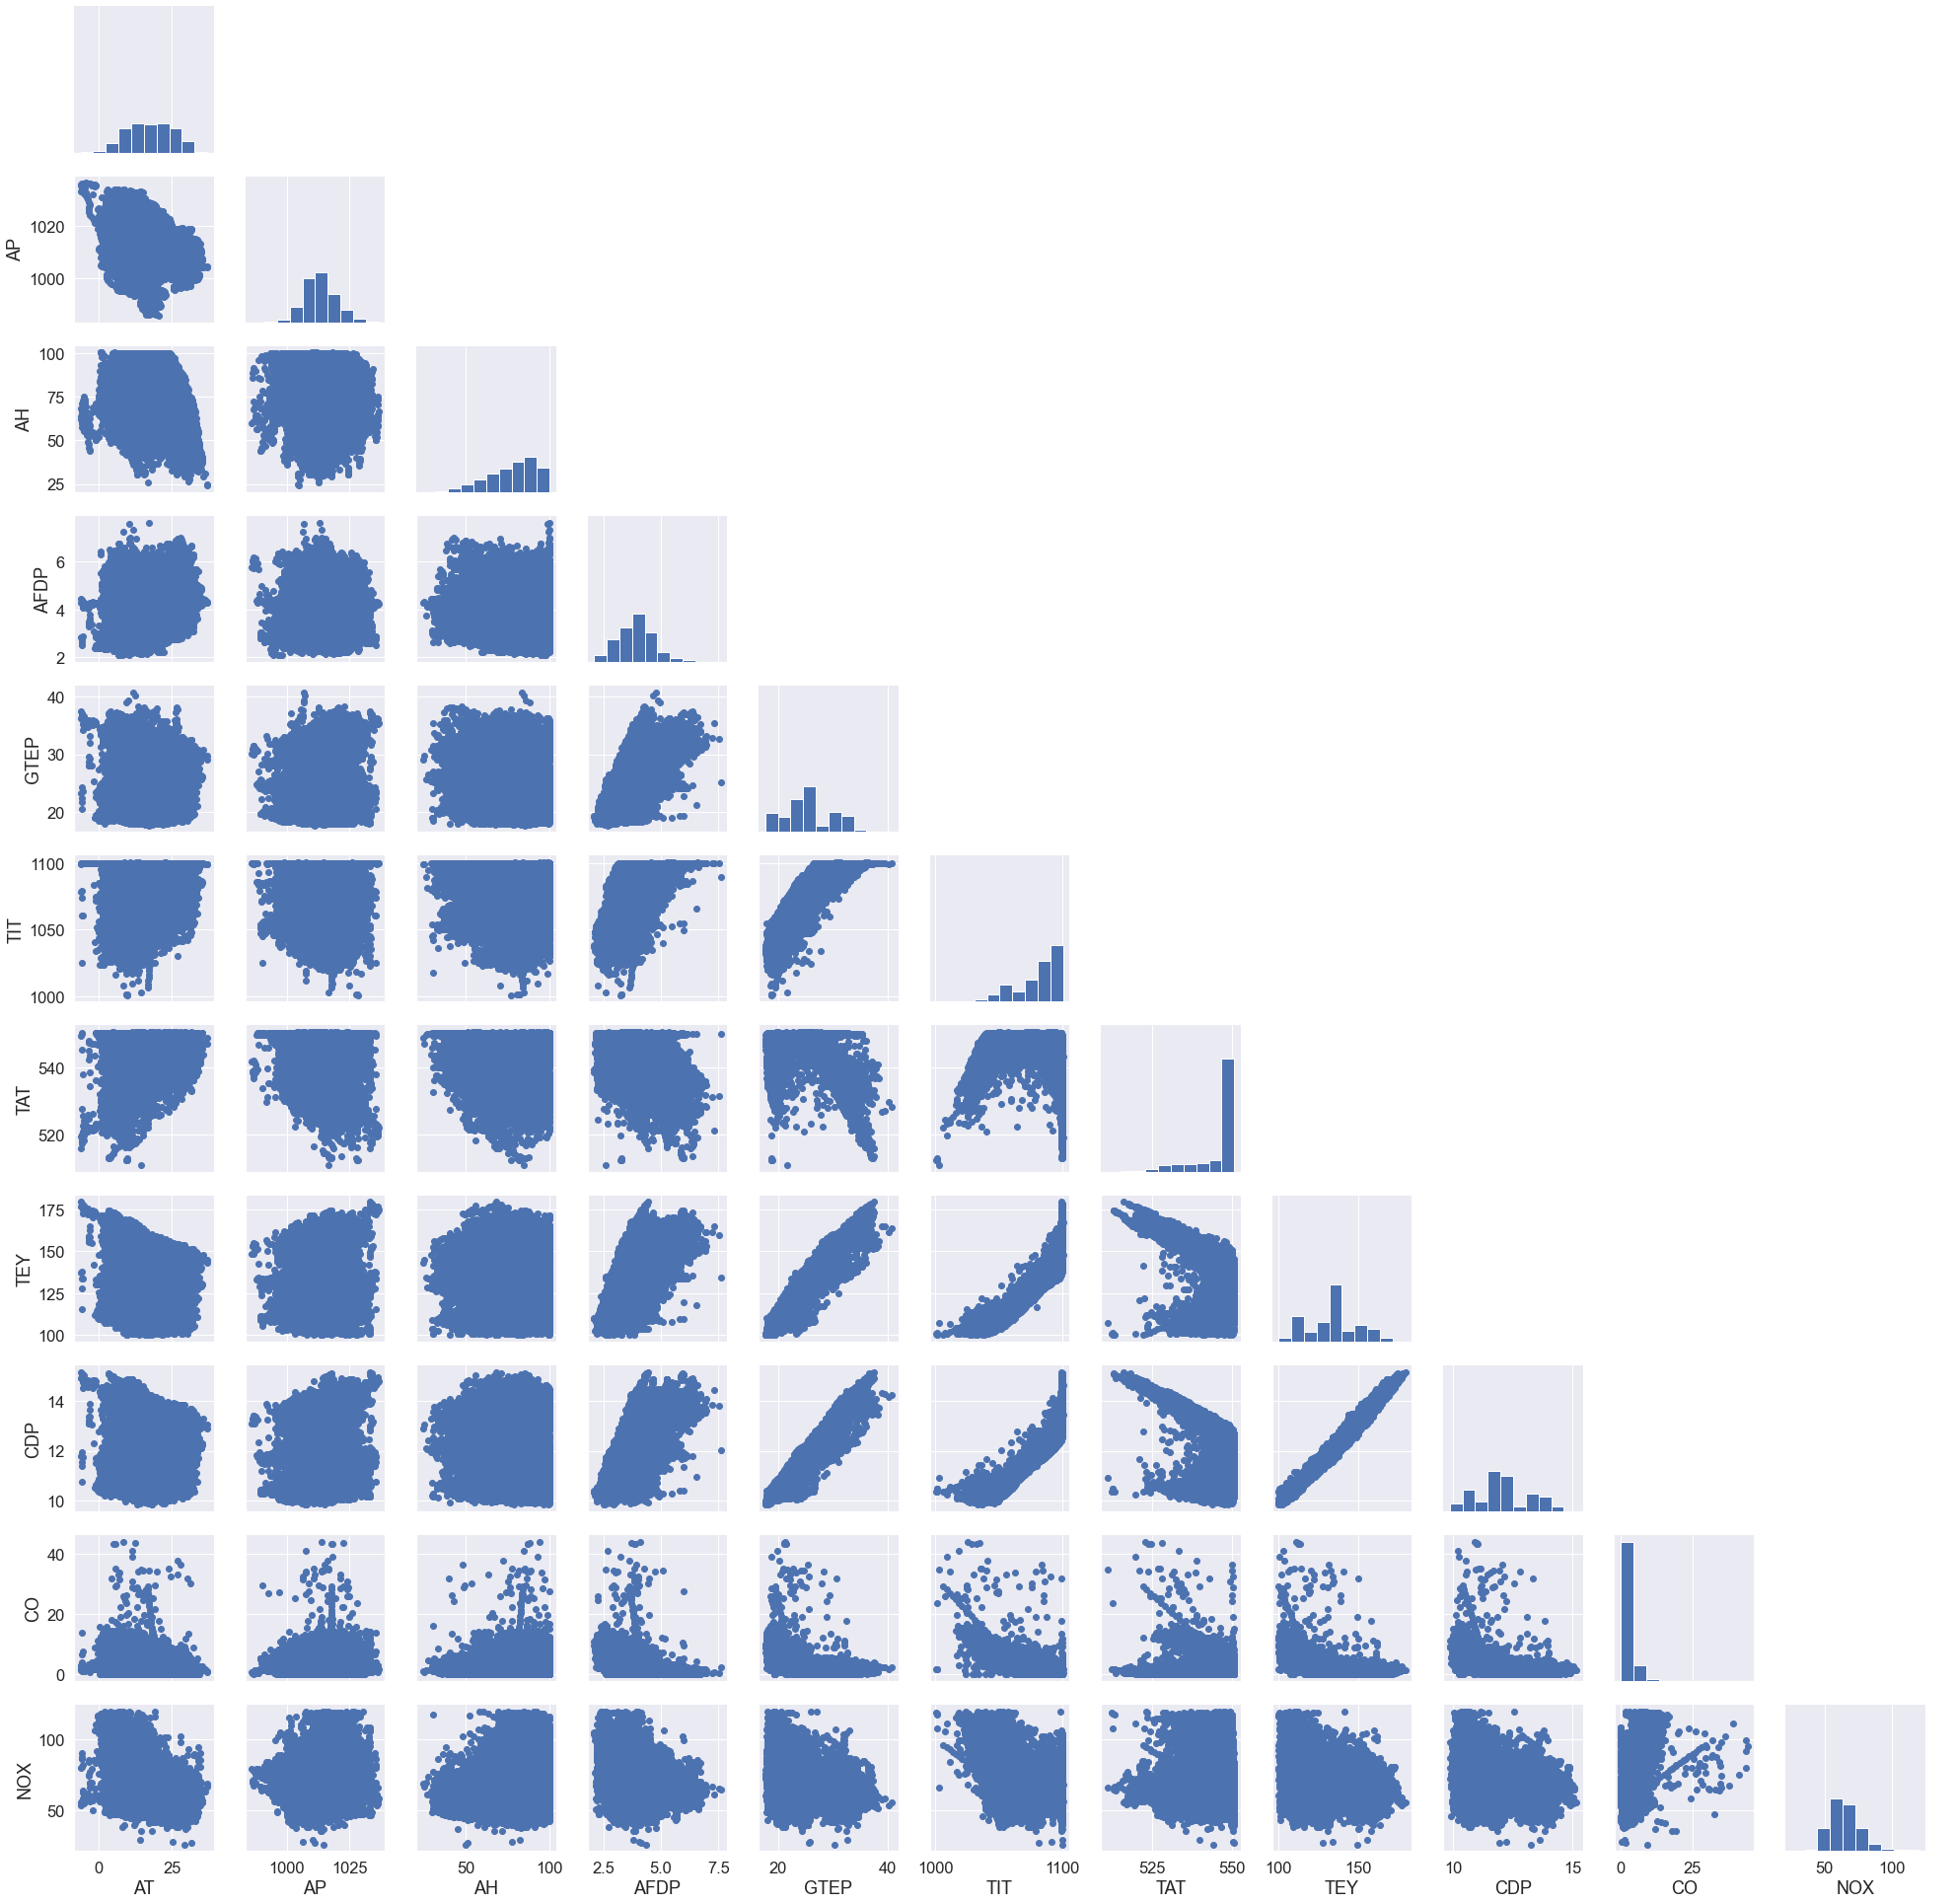

In [86]:
# Pairgrid plot between variables
import seaborn
import matplotlib.pyplot as plt
graph = seaborn.PairGrid(df[['AT','AP','AH','AFDP','GTEP','TIT','TAT','TEY','CDP','CO','NOX']],corner = True)
graph = graph.map_diag(plt.hist) 
# type of graph for non-diagonal 
graph = graph.map_offdiag(plt.scatter) 
# to add legends 
graph = graph.add_legend() 
# to show 
plt.show()

# 2. Exploratory Data Analysis

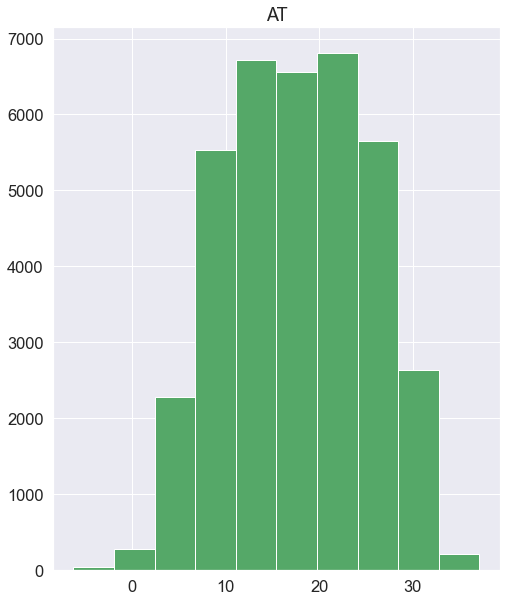

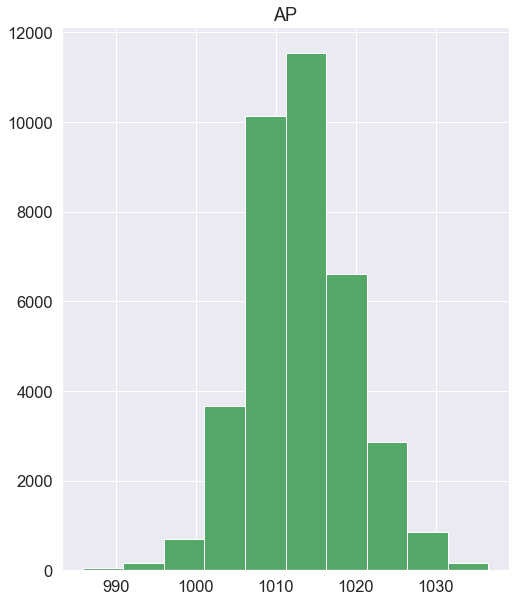

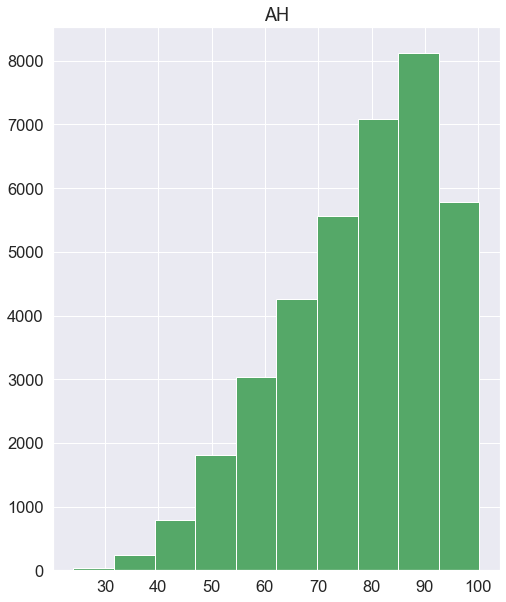

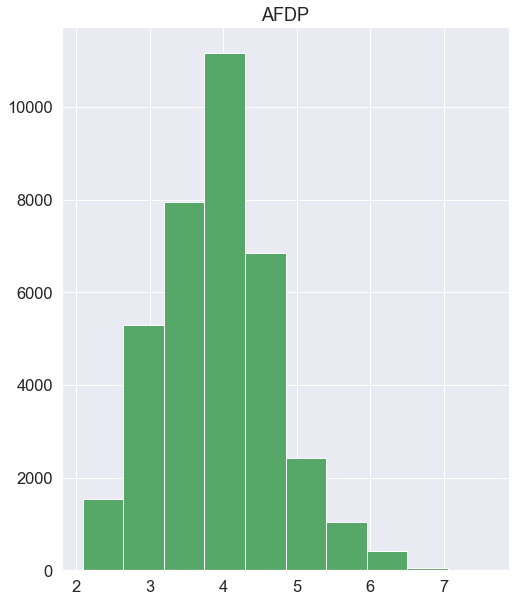

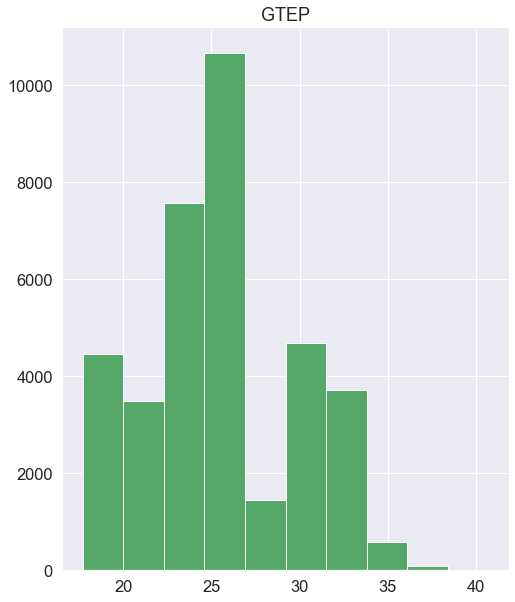

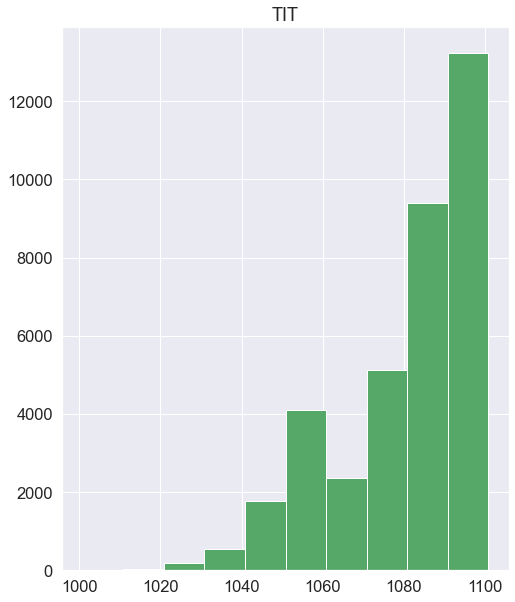

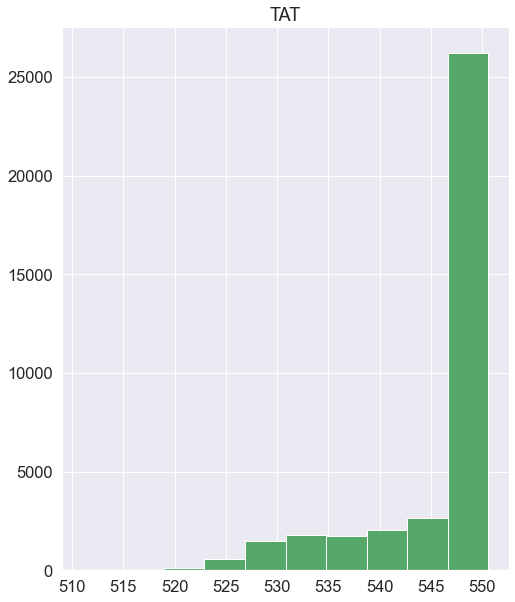

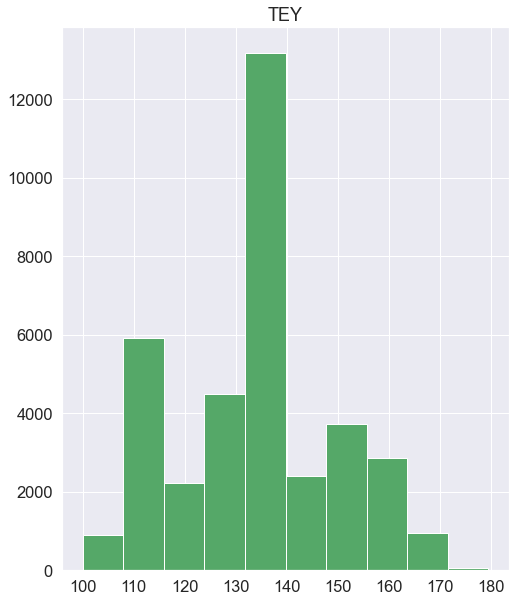

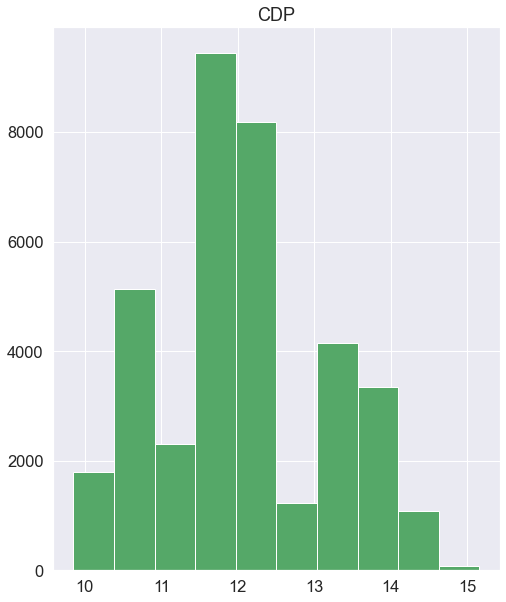

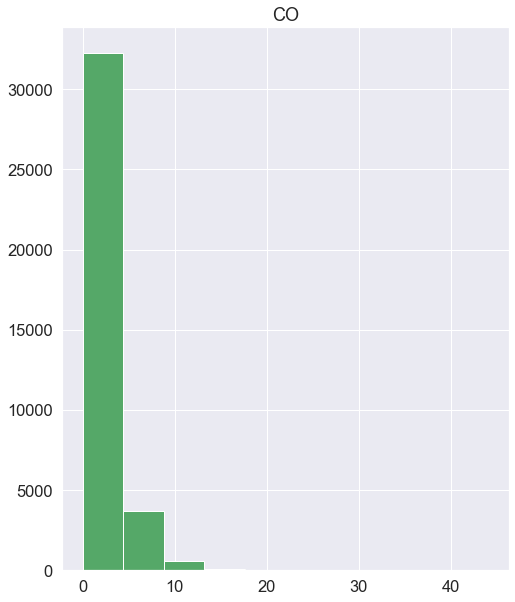

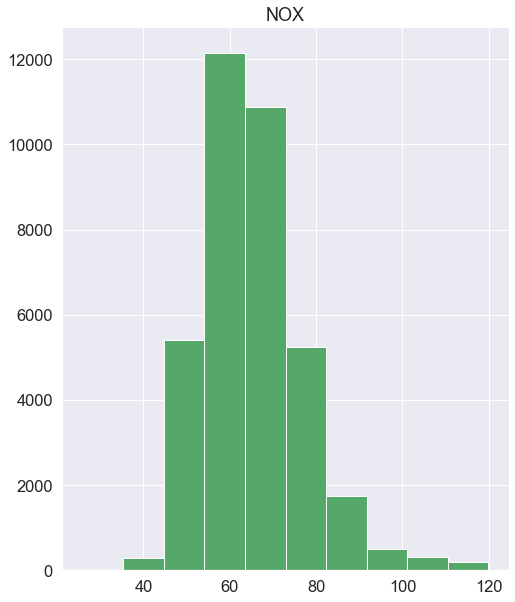

In [87]:
# create histogram for each variabel to check normality.
import matplotlib.pyplot as plt
for i in df.columns:
    plt.hist(df[i], color = 'g')
    plt.title(i)
    plt.show()
  

 Dataset is clean and has no missing values. Few parameters are normal except TIT, TEY, TAT, GTEP, CO & AH.
 Furthemore, Standard devitaion is small for all parameters hence most of data is close to mean.
 Data will be normalized before splitting it into training & testing data.

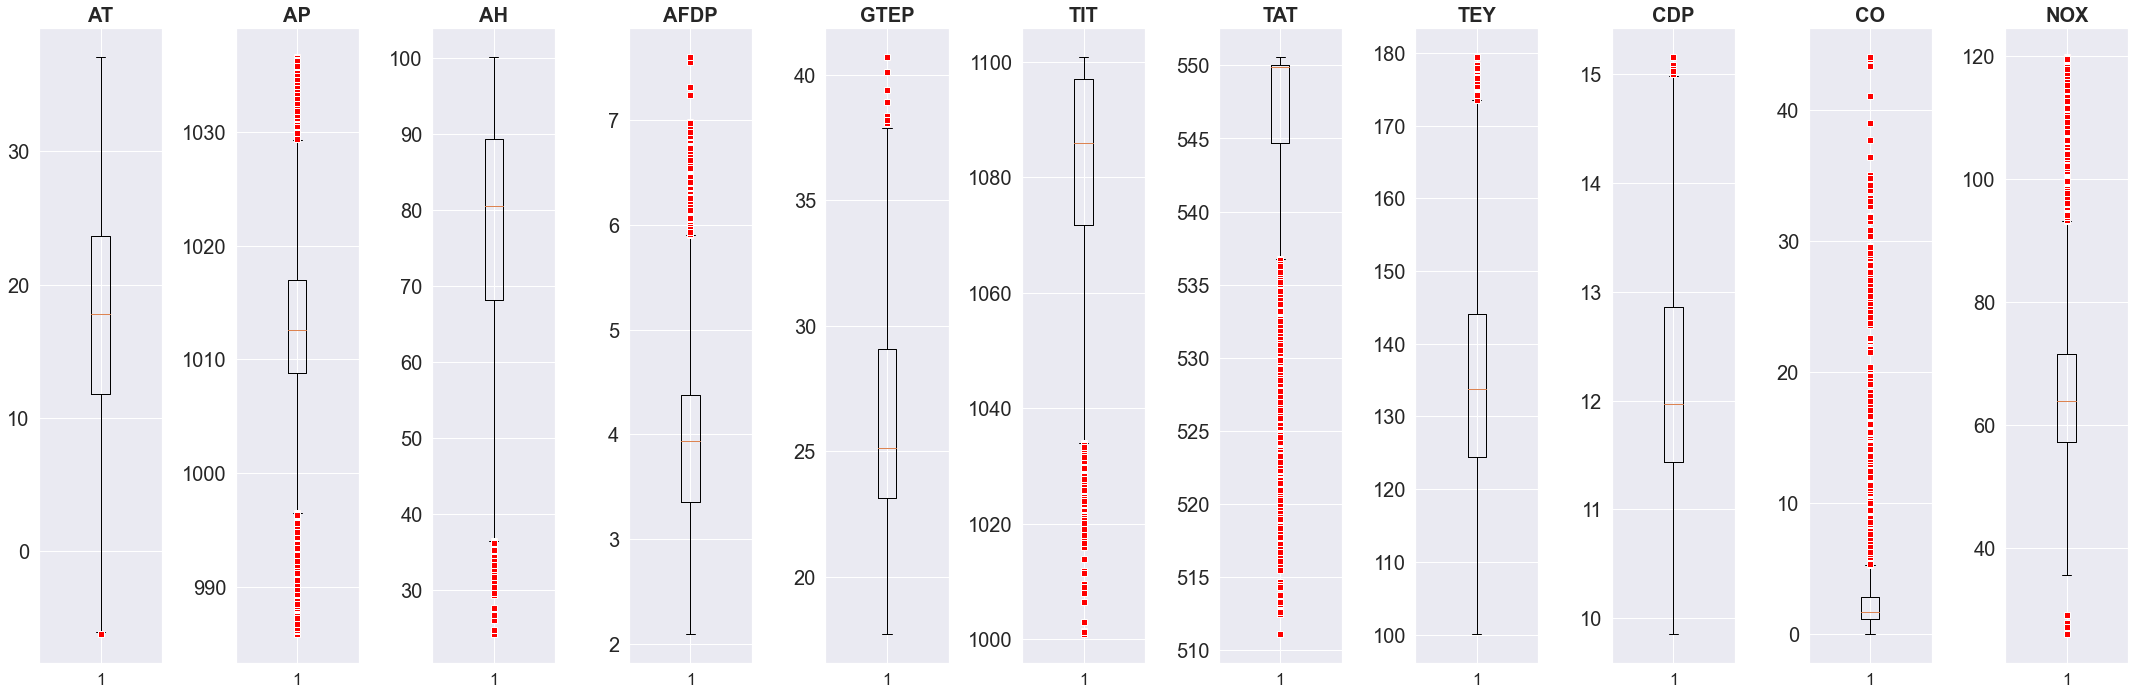

In [88]:
# Outliers detection
red_circle = dict(markerfacecolor = 'red', marker = 's', markeredgecolor= 'white')
fig, axs = plt.subplots(1,len(df.columns), figsize = (30,10))
for i, ax in enumerate(axs.flat):
    ax.boxplot(df.iloc[:,i], flierprops = red_circle)
    ax.set_title(df.columns[i], fontsize = 20, fontweight = 'bold')
    ax.tick_params(axis = 'y', labelsize = 20)
    
plt.tight_layout()

In [89]:
from plotly.subplots import make_subplots
import plotly.graph_objects as go
fig = make_subplots(rows=2, cols=2, start_cell="bottom-left")

fig.add_trace(go.Box(x=df['AT']),row=1, col=1)
fig.add_trace(go.Box(x=df['TAT']),row=2, col=1)
fig.update_layout(height=700, showlegend=False)
fig.show()

The boxplot shows that more input variables are outliers, so I'll use mean absolute error (MAE) to evaluate the model in modeling. The MAE is not sensitive to the outliers

# 3. Feature selection Filter Based Tecnhiques
## 3.1 Feature Selection with the help of correlation

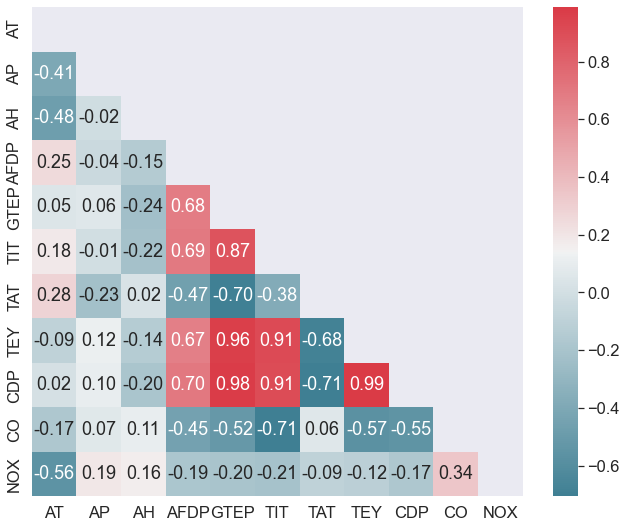

In [90]:
# let's visualize the correlation thru heatmap
!pip install pandas --upgrade
import matplotlib.pyplot as plt
import seaborn as sns
corr_matrix = df.corr(method = 'pearson')
plt.figure(figsize=(11,9))
dropSelf = np.zeros_like(corr_matrix)
dropSelf[np.triu_indices_from(dropSelf)] = True

sns.heatmap(corr_matrix, cmap=sns.diverging_palette(220, 10, as_cmap=True), annot=True, fmt=".2f", mask=dropSelf)

sns.set(font_scale=1.5)

The heatmap above shows the correlation between features and output variables(CO and NOx). It is easy to see that some features are negatively correlated each other. For example, the correlation between TIT and CO is -0.71, and it means that when the Turbine Inlet Temperature (TIT) decreases, the gas-turbine engine will produce more CO because a low TIT reduces the efficiency of the gas-turbine engine(look at the figure below).
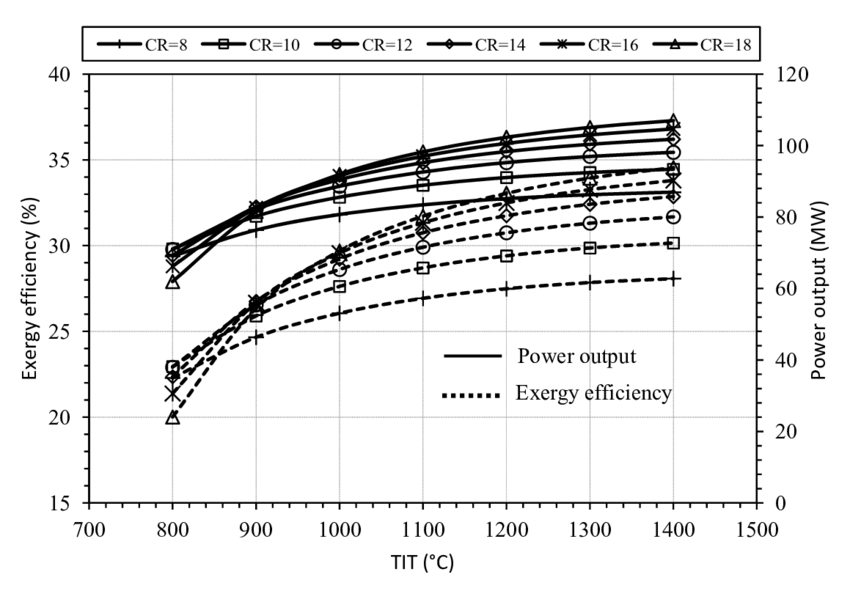

In [91]:
X = df.drop(columns = ['CO', 'NOX'])
Y_CO = df[['CO']]
Y_NOX = df[['NOX']]
print(X)
print(Y_CO)

           AT      AP      AH    AFDP    GTEP     TIT     TAT     TEY     CDP
0      4.5878  1018.7  83.675  3.5758  23.979  1086.2  549.83  134.67  11.898
1      4.2932  1018.3  84.235  3.5709  23.951  1086.1  550.05  134.67  11.892
2      3.9045  1018.4  84.858  3.5828  23.990  1086.5  550.19  135.10  12.042
3      3.7436  1018.3  85.434  3.5808  23.911  1086.5  550.17  135.03  11.990
4      3.7516  1017.8  85.182  3.5781  23.917  1085.9  550.00  134.67  11.910
...       ...     ...     ...     ...     ...     ...     ...     ...     ...
36728  3.6268  1028.5  93.200  3.1661  19.087  1037.0  541.59  109.08  10.411
36729  4.1674  1028.6  94.036  3.1923  19.016  1037.6  542.28  108.79  10.344
36730  5.4820  1028.5  95.219  3.3128  18.857  1038.0  543.48  107.81  10.462
36731  5.8837  1028.7  94.200  3.9831  23.563  1076.9  550.11  131.41  11.771
36732  6.0392  1028.8  94.547  3.8752  22.524  1067.9  548.23  125.41  11.462

[36733 rows x 9 columns]
             CO
0       0.32663
1     

<AxesSubplot:>

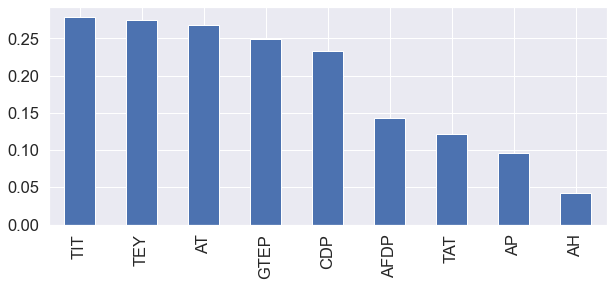

In [92]:
#Find the information gain or mutual information of the independent variable with respect to a target variable NOX
import warnings
warnings.simplefilter("ignore")
from sklearn.feature_selection import mutual_info_regression
mi_NOX = mutual_info_regression(X, Y_NOX)
mi_NOX = pd.Series(mi_NOX)
mi_NOX.index = X.columns
mi_NOX.sort_values(ascending=False)
mi_NOX.sort_values(ascending=False).plot.bar(figsize=(10, 4))

<AxesSubplot:>

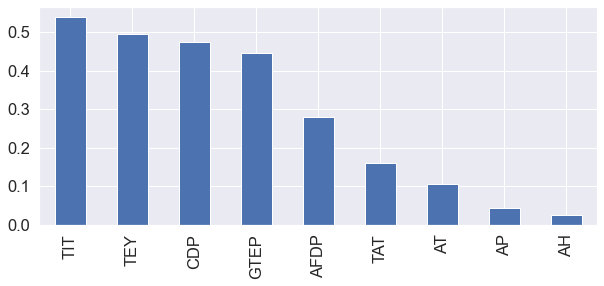

In [93]:
#Find the information gain or mutual information of the independent variable with respect to a target variable CO
import warnings
warnings.simplefilter("ignore")
from sklearn.feature_selection import mutual_info_regression
mi_CO = mutual_info_regression(X, Y_CO)
mi_CO = pd.Series(mi_CO)
mi_CO.index = X.columns
mi_CO.sort_values(ascending=False)
mi_CO.sort_values(ascending=False).plot.bar(figsize=(10, 4))

In [94]:
from sklearn.feature_selection import SelectKBest
sel_five_cols = SelectKBest(mutual_info_regression, k=5)
sel_five_cols.fit(X, Y_CO)
X.columns[sel_five_cols.get_support()]

Index(['AFDP', 'GTEP', 'TIT', 'TEY', 'CDP'], dtype='object')

In [95]:
from sklearn.feature_selection import SelectKBest
sel_five_cols = SelectKBest(mutual_info_regression, k=5)
sel_five_cols.fit(X, Y_NOX)
X.columns[sel_five_cols.get_support()]

Index(['AT', 'GTEP', 'TIT', 'TEY', 'CDP'], dtype='object')

# 4 Wrapper technique for feature selection

In [96]:
!pip install mlxtend

## 4.1 Forward Selection — SFS() from mlxtend

In [97]:
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
#Define Sequential Forward Selection (sfs)
sfs = SFS(LinearRegression(),
           k_features=5,
           forward=True,
           floating=False,
           scoring = 'r2',
           cv = 0)

X_train, X_test, y_train_CO, y_test_CO = train_test_split(X, Y_CO, test_size = 0.30)
#Use SFS to select the top 5 features 
sfs.fit(X_train, y_train_CO)

#Create a dataframe for the SFS results 
df_SFS_results = pd.DataFrame(sfs.subsets_).transpose()
df_SFS_results

,feature_idx,cv_scores,avg_score,feature_names
1,"(5,)",[0.4972171768384537],0.497217,"(TIT,)"
2,"(5, 6)",[0.5488579629113939],0.548858,"(TIT, TAT)"
3,"(2, 5, 6)",[0.5530956304847899],0.553096,"(AH, TIT, TAT)"
4,"(2, 5, 6, 7)",[0.5545484008392942],0.554548,"(AH, TIT, TAT, TEY)"
5,"(2, 5, 6, 7, 8)",[0.5561787137399707],0.556179,"(AH, TIT, TAT, TEY, CDP)"


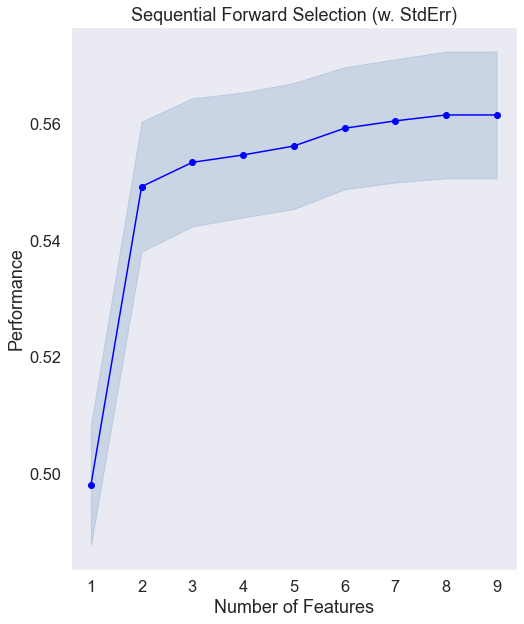

In [98]:
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs
sfs = SFS(LinearRegression(), 
          k_features=9, 
          forward=True, 
          floating=False, 
          scoring='r2',
          cv=5)

sfs = sfs.fit(X_train, y_train_CO)
fig = plot_sfs(sfs.get_metric_dict(), kind='std_err')

plt.title('Sequential Forward Selection (w. StdErr)')
plt.grid()
plt.show()

In [99]:
# SFS for depedent variable NOX
X_train, X_test, y_train_NOX, y_test_NOX = train_test_split(X, Y_NOX, test_size = 0.30)
#Use SFS to select the top 5 features 
sfs.fit(X_train, y_train_NOX)

#Create a dataframe for the SFS results 
df_SFS_results = pd.DataFrame(sfs.subsets_).transpose()
df_SFS_results

,feature_idx,cv_scores,avg_score,feature_names
1,"(0,)","[0.3315980793372272, 0.30919519589966593, 0.30...",0.315155,"(AT,)"
2,"(0, 4)","[0.35502419046506484, 0.3442658810009007, 0.33...",0.346237,"(AT, GTEP)"
3,"(0, 2, 4)","[0.37968134520301255, 0.3698559432270009, 0.35...",0.372233,"(AT, AH, GTEP)"
4,"(0, 2, 3, 4)","[0.39361076430217257, 0.3879592768320106, 0.37...",0.389535,"(AT, AH, AFDP, GTEP)"
5,"(0, 2, 3, 4, 5)","[0.40523593415972536, 0.3964769328624066, 0.38...",0.397903,"(AT, AH, AFDP, GTEP, TIT)"
6,"(0, 2, 3, 4, 5, 6)","[0.43579464759966335, 0.42437717719722623, 0.4...",0.430163,"(AT, AH, AFDP, GTEP, TIT, TAT)"
7,"(0, 2, 3, 4, 5, 6, 7)","[0.5101425891229787, 0.5034572705059585, 0.486...",0.50501,"(AT, AH, AFDP, GTEP, TIT, TAT, TEY)"
8,"(0, 1, 2, 3, 4, 5, 6, 7)","[0.5254445068002067, 0.5182966791611727, 0.501...",0.519142,"(AT, AP, AH, AFDP, GTEP, TIT, TAT, TEY)"
9,"(0, 1, 2, 3, 4, 5, 6, 7, 8)","[0.5258047183117341, 0.518382910842021, 0.5019...",0.519353,"(AT, AP, AH, AFDP, GTEP, TIT, TAT, TEY, CDP)"


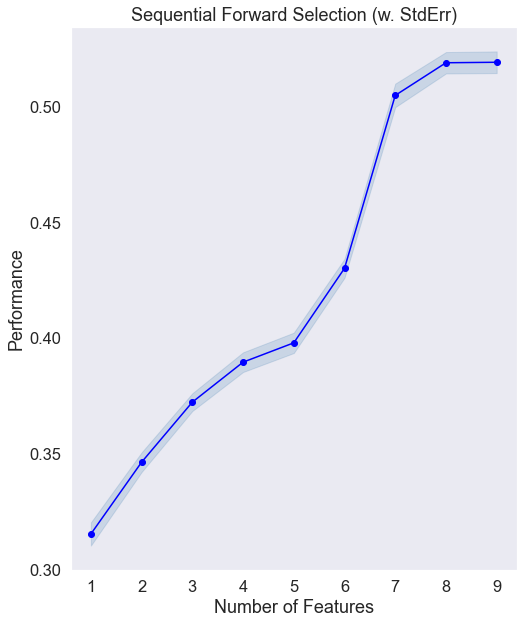

In [100]:
sfs = SFS(LinearRegression(), 
          k_features=9, 
          forward=True, 
          floating=False, 
          scoring='r2',
          cv=5)

sfs = sfs.fit(X_train, y_train_NOX)
fig = plot_sfs(sfs.get_metric_dict(), kind='std_err')

plt.title('Sequential Forward Selection (w. StdErr)')
plt.grid()
plt.show()

## 4.2 Backward elimination — RFE() from Sklearn

In [101]:
from sklearn.feature_selection import RFE
#Build a logistic regression model 
#model = LinearRegression()
#Define RFE 
rfe = RFE(estimator=LinearRegression(), n_features_to_select=5)
#Use RFE to select the top 5 features 
fit = rfe.fit(X_train, y_train_CO)

features = X.columns.to_list()
df_RFE_results = []
for i in range(X.shape[1]):
    df_RFE_results.append(
        {      
            'Feature_names': features[i],
            'Selected':  rfe.support_[i],
            'RFE_ranking':  rfe.ranking_[i],
        }
    )

df_RFE_results = pd.DataFrame(df_RFE_results)
df_RFE_results.index.name='Columns'
df_RFE_results

,Feature_names,Selected,RFE_ranking
Columns,,,
0,AT,False,4
1,AP,False,2
2,AH,False,3
3,AFDP,True,1
4,GTEP,True,1
5,TIT,True,1
6,TAT,True,1
7,TEY,False,5
8,CDP,True,1


In [102]:
#Use RFE to select the top 5 features for target variable NOX
fit = rfe.fit(X_train, y_train_NOX)

features = X.columns.to_list()
df_RFE_results = []
for i in range(X.shape[1]):
    df_RFE_results.append(
        {      
            'Feature_names': features[i],
            'Selected':  rfe.support_[i],
            'RFE_ranking':  rfe.ranking_[i],
        }
    )

df_RFE_results = pd.DataFrame(df_RFE_results)
df_RFE_results.index.name='Columns'
df_RFE_results

,Feature_names,Selected,RFE_ranking
Columns,,,
0,AT,True,1
1,AP,False,3
2,AH,False,4
3,AFDP,False,2
4,GTEP,False,5
5,TIT,True,1
6,TAT,True,1
7,TEY,True,1
8,CDP,True,1


# # backward elimintaion using SFS

In [103]:
#Define Sequential Forward Selection (sfs)
sfs = SFS(LinearRegression(),
           k_features=5,
           forward=False,
           floating=False,
           scoring = 'r2',
           cv = 0)
#Use SFS to select the top 5 features 
sfs.fit(X_train, y_train_CO)

#Create a dataframe for the SFS results 
df_SFS_results = pd.DataFrame(sfs.subsets_).transpose()
df_SFS_results

,feature_idx,cv_scores,avg_score,feature_names
9,"(0, 1, 2, 3, 4, 5, 6, 7, 8)",[0.00045823901992214644],0.000458,"(AT, AP, AH, AFDP, GTEP, TIT, TAT, TEY, CDP)"
8,"(0, 1, 2, 3, 4, 5, 6, 8)",[0.00045823752129858786],0.000458,"(AT, AP, AH, AFDP, GTEP, TIT, TAT, CDP)"
7,"(1, 2, 3, 4, 5, 6, 8)",[0.0004571631789145325],0.000457,"(AP, AH, AFDP, GTEP, TIT, TAT, CDP)"
6,"(2, 3, 4, 5, 6, 8)",[0.0004532043273679509],0.000453,"(AH, AFDP, GTEP, TIT, TAT, CDP)"
5,"(2, 3, 4, 6, 8)",[0.0004500474025369572],0.00045,"(AH, AFDP, GTEP, TAT, CDP)"


In [104]:
sfs = SFS(LinearRegression(),
           k_features=5,
           forward=False,
           floating=False,
           scoring = 'r2',
           cv = 0)
#Use SFS to select the top 5 features 
sfs.fit(X_train, y_train_NOX)

#Create a dataframe for the SFS results 
df_SFS_results = pd.DataFrame(sfs.subsets_).transpose()
df_SFS_results

,feature_idx,cv_scores,avg_score,feature_names
9,"(0, 1, 2, 3, 4, 5, 6, 7, 8)",[0.519746042561368],0.519746,"(AT, AP, AH, AFDP, GTEP, TIT, TAT, TEY, CDP)"
8,"(0, 1, 2, 3, 5, 6, 7, 8)",[0.5196615349965235],0.519662,"(AT, AP, AH, AFDP, TIT, TAT, TEY, CDP)"
7,"(0, 1, 2, 3, 5, 6, 7)",[0.5193263093713347],0.519326,"(AT, AP, AH, AFDP, TIT, TAT, TEY)"
6,"(0, 1, 2, 5, 6, 7)",[0.5185397812917218],0.51854,"(AT, AP, AH, TIT, TAT, TEY)"
5,"(0, 2, 5, 6, 7)",[0.5046565412285224],0.504657,"(AT, AH, TIT, TAT, TEY)"


## 4.3 Step-wise Selection — SFFS() from mlxtend

In [105]:
#Define Sequential Forward Selection (sfs)
sfs = SFS(LinearRegression(),
           k_features=5,
           forward=True,
           floating=True,
           scoring = 'r2',
           cv = 0)
#Use SFS to select the top 5 features 
sfs.fit(X, Y_CO)

#Create a dataframe for the SFS results 
df_SFS_results = pd.DataFrame(sfs.subsets_).transpose()
df_SFS_results

,feature_idx,cv_scores,avg_score,feature_names
1,"(5,)",[0.49882444817014526],0.498824,"(TIT,)"
2,"(5, 6)",[0.5507217644680591],0.550722,"(TIT, TAT)"
3,"(2, 5, 6)",[0.5552174969842719],0.555217,"(AH, TIT, TAT)"
4,"(2, 5, 6, 7)",[0.55644618886337],0.556446,"(AH, TIT, TAT, TEY)"
5,"(2, 5, 6, 7, 8)",[0.5581241617573389],0.558124,"(AH, TIT, TAT, TEY, CDP)"


In [106]:
#Define Sequential Forward Selection (sfs)
sfs = SFS(LinearRegression(),
           k_features=5,
           forward=True,
           floating=True,
           scoring = 'r2',
           cv = 0)
#Use SFS to select the top 5 features 
sfs.fit(X, Y_NOX)

#Create a dataframe for the SFS results 
df_SFS_results = pd.DataFrame(sfs.subsets_).transpose()
df_SFS_results

,feature_idx,cv_scores,avg_score,feature_names
1,"(0,)",[0.31155773122511365],0.311558,"(AT,)"
2,"(0, 4)",[0.34261205608496104],0.342612,"(AT, GTEP)"
3,"(0, 2, 4)",[0.3691172137915859],0.369117,"(AT, AH, GTEP)"
4,"(0, 2, 3, 4)",[0.3870041880302296],0.387004,"(AT, AH, AFDP, GTEP)"
5,"(0, 2, 3, 4, 5)",[0.3947387026237553],0.394739,"(AT, AH, AFDP, GTEP, TIT)"


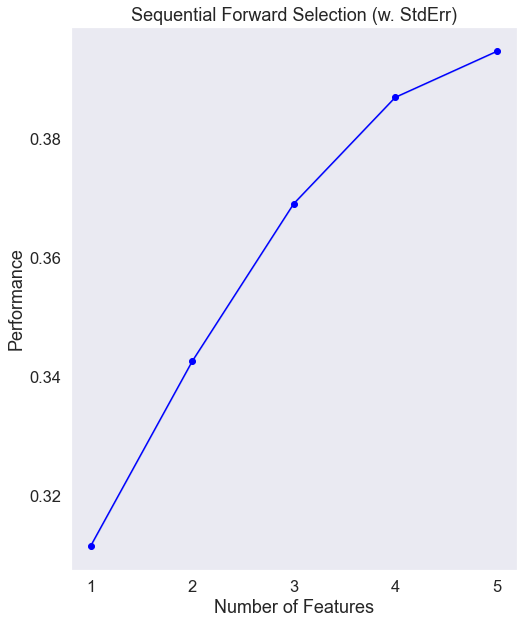

In [107]:
fig1 = plot_sfs(sfs.get_metric_dict(), kind='std_dev')
plt.title('Sequential Forward Selection (w. StdErr)')
plt.grid()
plt.show()

# 5. Embedded Feature Selection Methods

## 5.1 Random Forest

In [108]:
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn import tree
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import SelectFromModel

In [177]:
# Normalize feature vector
X1 = StandardScaler().fit_transform(X)
# Split the dataset
X_train, X_test, y_train_CO, y_test_CO = train_test_split(X1, Y_CO, test_size = 0.30)

# selecting the features
sel = SelectFromModel(RandomForestRegressor(n_estimators = 100,max_features=5))
sel.fit(X_train, y_train_CO)

SelectFromModel(estimator=RandomForestRegressor(max_features=5))

Feature: 0, Score: 0.05829
Feature: 1, Score: 0.03183
Feature: 2, Score: 0.03715
Feature: 3, Score: 0.05122
Feature: 4, Score: 0.03833
Feature: 5, Score: 0.51454
Feature: 6, Score: 0.20754
Feature: 7, Score: 0.03699
Feature: 8, Score: 0.02411


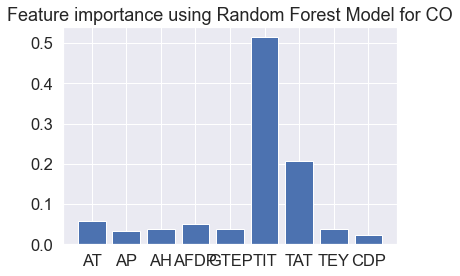

In [178]:
from matplotlib import pyplot
# define the model
model = RandomForestRegressor()
# fit the model
model.fit(X_train, y_train_CO)
# get importance
importance = model.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar(X.columns, importance)
plt.title("Feature importance using Random Forest Model for CO")
pyplot.show()

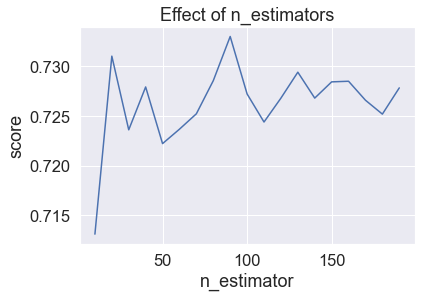

In [179]:
# Try different numbers of n_estimators 
estimators = np.arange(10, 200, 10)
scores = []
for n in estimators:
    model.set_params(n_estimators=n)
    model.fit(X_train, y_train_CO)
    scores.append(model.score(X_test, y_test_CO))
plt.title("Effect of n_estimators")
plt.xlabel("n_estimator")
plt.ylabel("score")
plt.plot(estimators, scores)

In [180]:
y_pred_CO = model.predict(X_test)
from sklearn import metrics
#from sklearn.metrics import r2_score

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test_CO, y_pred_CO))
print('Mean Squared Error:', metrics.mean_squared_error(y_test_CO, y_pred_CO))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test_CO, y_pred_CO)))
print("R2: ", metrics.r2_score(y_test_CO, y_pred_CO))

Mean Absolute Error: 0.4885408210001911
Mean Squared Error: 1.4868259633845404
Root Mean Squared Error: 1.2193547323828864
R2:  0.7278244610041505


Feature: 0, Score: 0.13142
Feature: 1, Score: 0.11727
Feature: 2, Score: 0.13953
Feature: 3, Score: 0.13004
Feature: 4, Score: 0.10345
Feature: 5, Score: 0.07807
Feature: 6, Score: 0.10939
Feature: 7, Score: 0.09492
Feature: 8, Score: 0.09591


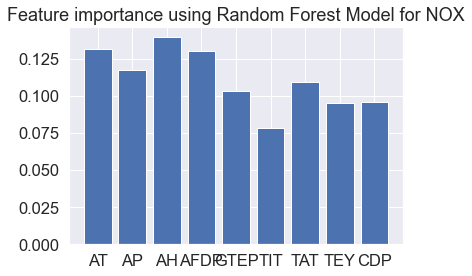

In [181]:
from matplotlib import pyplot
# define the model
model = RandomForestRegressor()
# fit the model
model.fit(X_train, y_train_NOX)
# get importance
importance = model.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar(X.columns, importance)
plt.title("Feature importance using Random Forest Model for NOX")
pyplot.show()

In [182]:
y_pred_NOX = model.predict(X_test)
from sklearn import metrics

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test_NOX, y_pred_NOX))
print('Mean Squared Error:', metrics.mean_squared_error(y_test_NOX, y_pred_NOX))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test_NOX, y_pred_NOX)))
print("R2: ", metrics.r2_score(y_test_NOX, y_pred_NOX))

Mean Absolute Error: 9.21327460082475
Mean Squared Error: 144.19230667600883
Root Mean Squared Error: 12.008010104759608
R2:  -0.05835595943392846


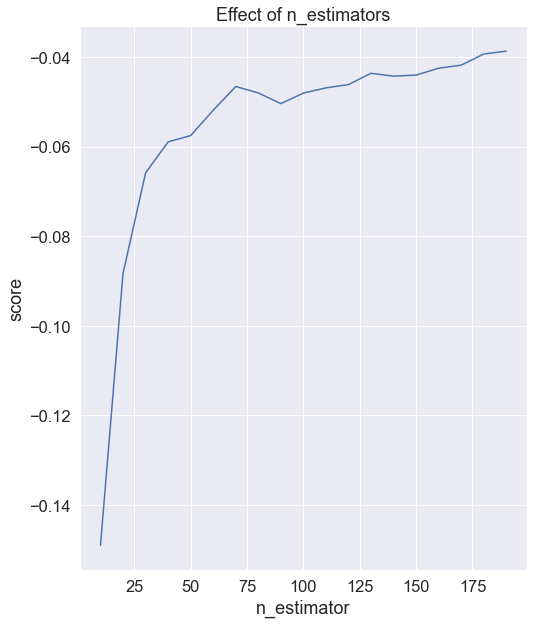

In [115]:
# Try different numbers of n_estimators 
estimators = np.arange(10, 200, 10)
scores = []
for n in estimators:
    model.set_params(n_estimators=n)
    model.fit(X_train, y_train_NOX)
    scores.append(model.score(X_test, y_test_NOX))
plt.title("Effect of n_estimators")
plt.xlabel("n_estimator")
plt.ylabel("score")
plt.plot(estimators, scores)

## 5.2 Lasso Regression

In [116]:
from sklearn.linear_model import LassoCV
lcv = LassoCV()
# Split the dataset
X_train, X_test, y_train_CO, y_test_CO = train_test_split(X1, Y_CO, test_size = 0.30, random_state = 0)

lcv.fit(X_train, y_train_CO)

print("Best alpha using built-in LassoCV: %f" % lcv.alpha_)
print("Best score using built-in LassoCV: %f" %lcv.score(X_train,y_train_CO))
coef = pd.Series(lcv.coef_, index = X.columns)

print("Lasso picked " + str(sum(coef != 0)) + " variables and eliminated the other " +  str(sum(coef == 0)) + " variables")

Best alpha using built-in LassoCV: 0.001593
Best score using built-in LassoCV: 0.559507
Lasso picked 9 variables and eliminated the other 0 variables


In [117]:
from sklearn.linear_model import Lasso
l1 = Lasso(alpha = 0.001593).fit(X_train, y_train_CO)
#print("Best score using built-in LassoCV: %f" %l1.score(X_train,y_train_CO))
coef = pd.Series(l1.coef_, index = X.columns)
coef

AT     -0.255437
AP      0.000267
AH     -0.113708
AFDP   -0.101240
GTEP    0.381959
TIT    -1.343750
TAT    -0.577548
TEY    -2.249451
CDP     1.470458
dtype: float64

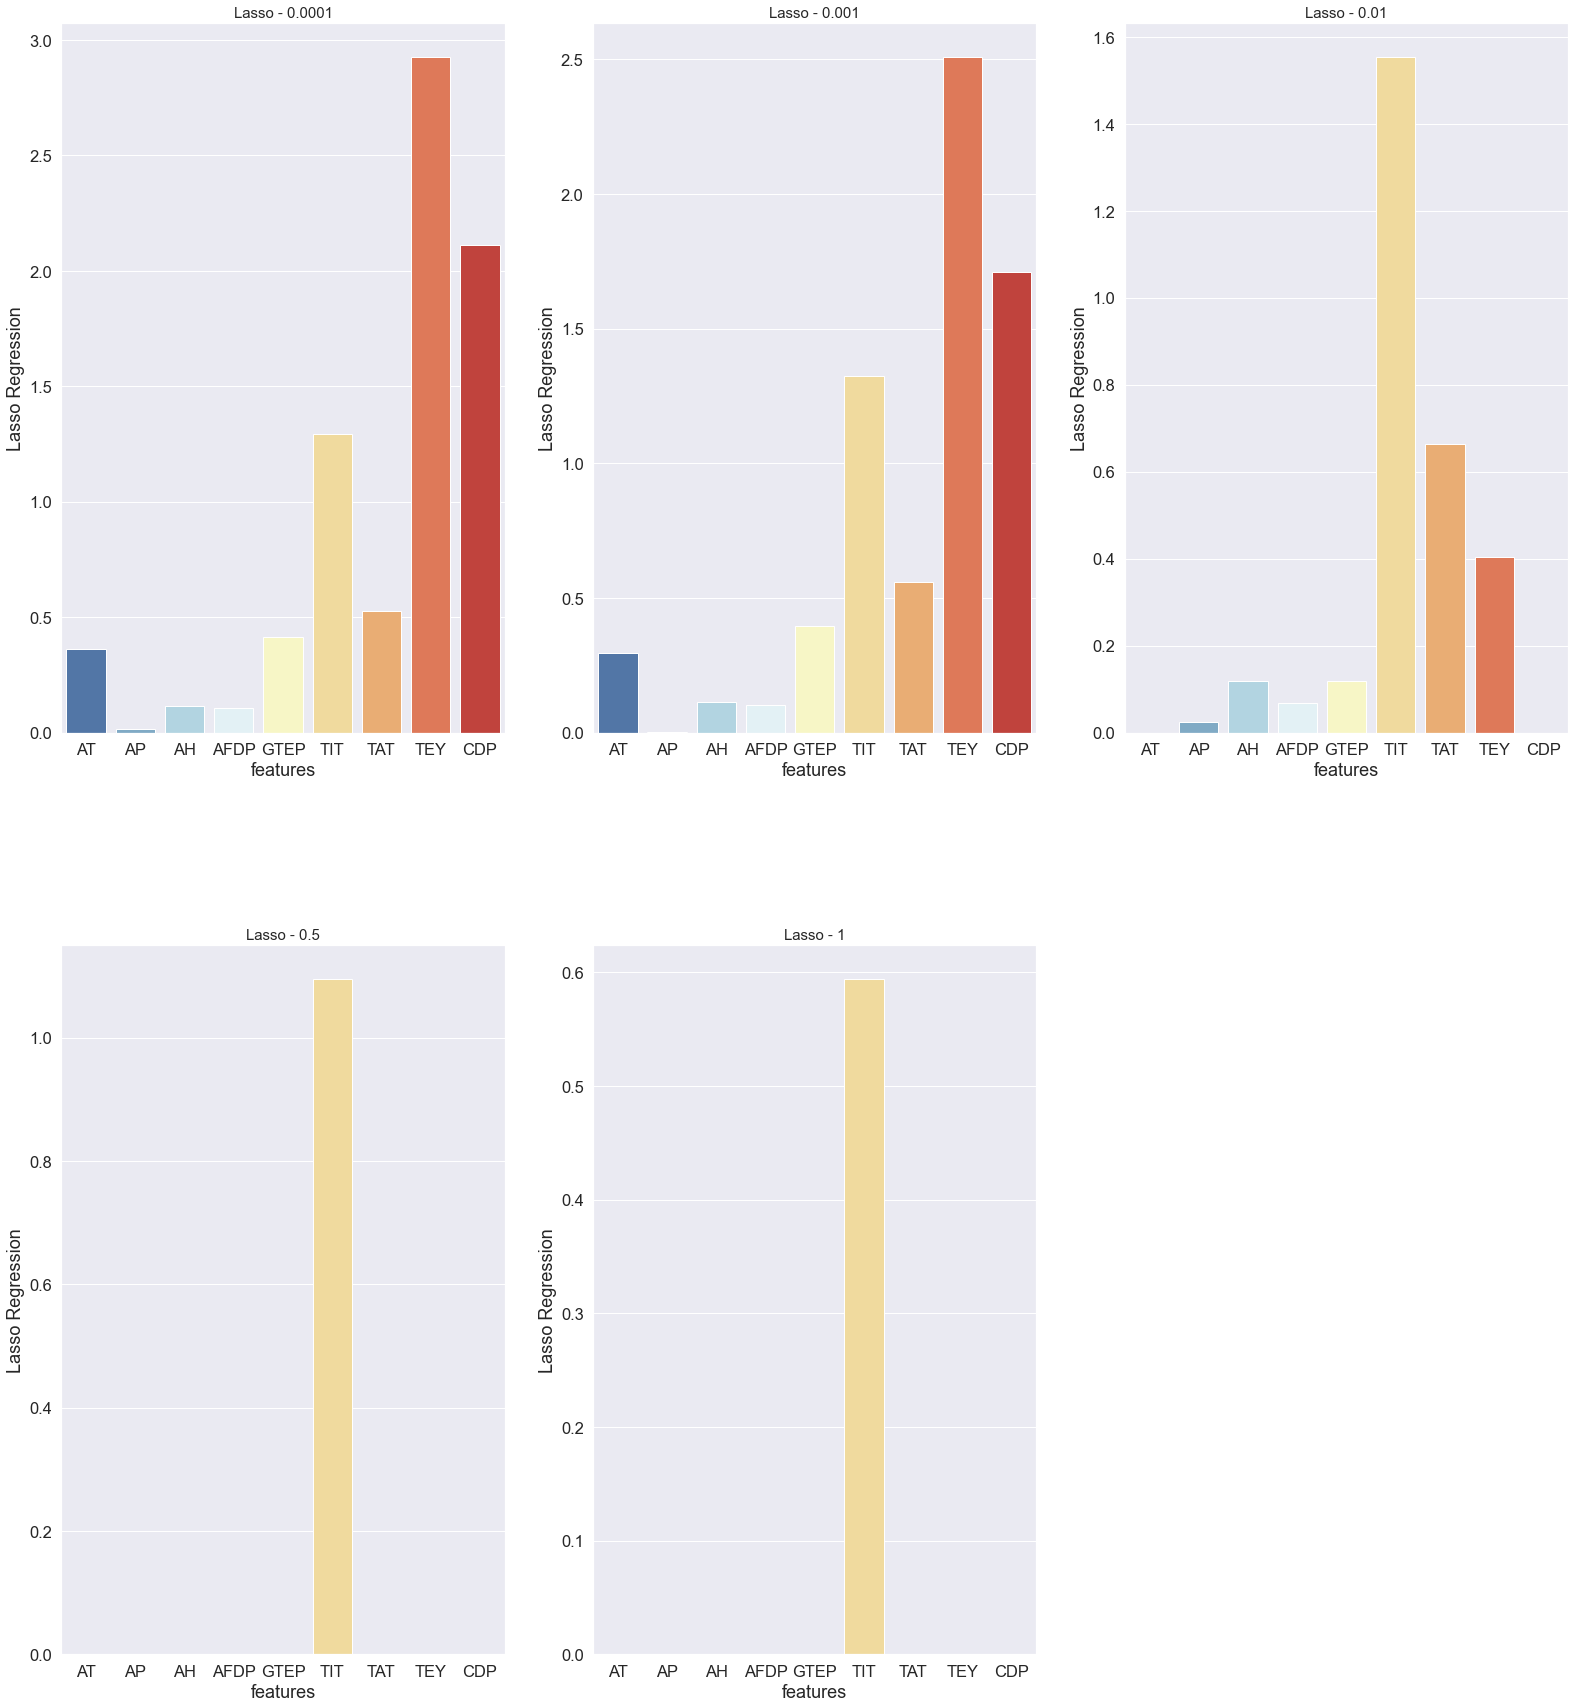

In [118]:
# Lasso Regression with different alpha values
import seaborn as sns
import matplotlib.pyplot as plt
cf = pd.DataFrame()
cf['features'] = X.columns

fig = plt.figure(figsize = (27,30))

i = 0

for a in [0.0001,0.001,0.01,0.5,1]:
    l2 = Lasso(alpha = a).fit(X_train, y_train_CO)
    l2_predict = l2.predict(X_test)
    
    cf['Lasso Regression'] = np.absolute(l2.coef_.ravel())
    sub = fig.add_subplot(2,3,i+1)
    plt.subplots_adjust(hspace = 0.3)
    sub.set_title('Lasso - ' + str(a), fontsize = 15)
    sns.barplot(x = "features", y = "Lasso Regression", data = cf, palette = 'RdYlBu_r')
    i = i+1
    

Text(0.5, 1.0, 'Feature importance using Lasso Model for CO')

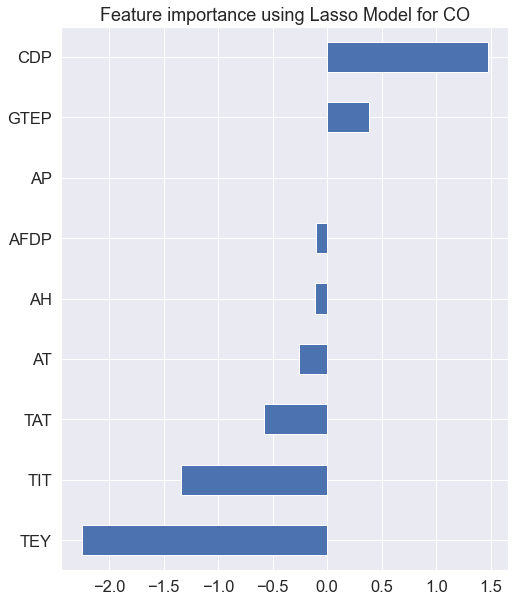

In [119]:
imp_coef = coef.sort_values()
import matplotlib
matplotlib.rcParams['figure.figsize'] = (8.0, 10.0)
imp_coef.plot(kind = "barh")
plt.title("Feature importance using Lasso Model for CO")

In [124]:
import sklearn.metrics as metrics
from scipy import stats
# Make Prediction
Y_pred_CO = lcv.predict(X_test)

# Return Results
print("The R-square is %0.2f"% lcv.score(X_test, y_test_CO))
print('Lasso Regression MAE: %0.1f'%metrics.mean_absolute_error(y_test_CO,Y_pred_CO))
print('Lasso Regression MSE:%0.1f'%metrics.mean_squared_error(y_test_CO,Y_pred_CO))
print('Lasso Regression RMSE:%0.1f'%np.sqrt(metrics.mean_squared_error(y_test_CO,Y_pred_CO)))
se_lcv = stats.sem(Y_pred_CO)

The R-square is 0.57
Lasso Regression MAE: 0.9
Lasso Regression MSE:2.2
Lasso Regression RMSE:1.5


In [125]:
# Split the dataset
X_train, X_test, y_train_NOX, y_test_NOX = train_test_split(X1, Y_NOX, test_size = 0.30, random_state = 0)

lcv.fit(X_train, y_train_NOX)

print("Best alpha using built-in LassoCV: %f" % lcv.alpha_)
print("Best score using built-in LassoCV: %f" %lcv.score(X_train,y_train_NOX))
coef = pd.Series(lcv.coef_, index = X.columns)

print("Lasso picked " + str(sum(coef != 0)) + " variables and eliminated the other " +  str(sum(coef == 0)) + " variables")

Best alpha using built-in LassoCV: 0.006519
Best score using built-in LassoCV: 0.518887
Lasso picked 9 variables and eliminated the other 0 variables


Text(0.5, 1.0, 'Feature importance using Lasso Model for NOX')

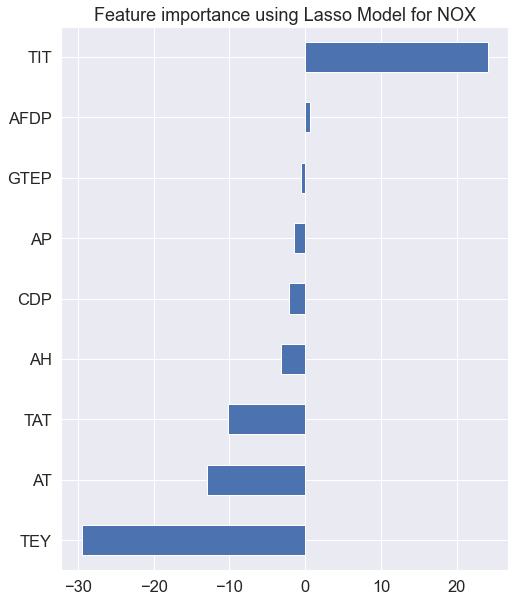

In [126]:
imp_coef = coef.sort_values()
import matplotlib
matplotlib.rcParams['figure.figsize'] = (8.0, 10.0)
imp_coef.plot(kind = "barh")
plt.title("Feature importance using Lasso Model for NOX")

In [127]:
import sklearn.metrics as metrics
from scipy import stats
# Make Prediction
Y_pred_NOX = lcv.predict(X_test)

# Return Results
print("The R-square is %0.2f"% lcv.score(X_test, y_test_NOX))
print('Lasso Regression MAE: %0.1f'%metrics.mean_absolute_error(y_test_NOX,Y_pred_NOX))
print('Lasso Regression MSE:%0.1f'%metrics.mean_squared_error(y_test_NOX,Y_pred_NOX))
print('Lasso Regression RMSE:%0.1f'%np.sqrt(metrics.mean_squared_error(y_test_NOX,Y_pred_NOX)))
se_lcv = stats.sem(Y_pred_NOX)

The R-square is 0.51
Lasso Regression MAE: 5.8
Lasso Regression MSE:66.0
Lasso Regression RMSE:8.1


# 6. Principal Component Analysis

Text(0.5, 1.0, 'CO')

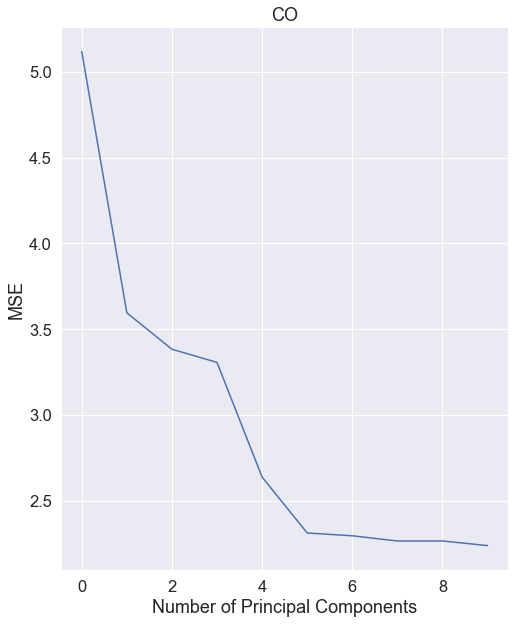

In [131]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale
from sklearn.model_selection import RepeatedKFold
from sklearn import model_selection

#define predictor and response variables
X = df.drop(columns = ['CO', 'NOX'])
Y_CO = df[['CO']]
Y_NOX = df[['NOX']]

#scale predictor variables
pca = PCA()
X_reduced = pca.fit_transform(scale(X))

#define cross validation method
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)

regr = LinearRegression()
mse = []

# Calculate MSE with only the intercept
score = -1*model_selection.cross_val_score(regr,
           np.ones((len(X_reduced),1)), Y_CO, cv=cv,
           scoring='neg_mean_squared_error').mean()    
mse.append(score)

# Calculate MSE using cross-validation, adding one component at a time
for i in np.arange(1, 10):
    score = -1*model_selection.cross_val_score(regr,
               X_reduced[:,:i], Y_CO, cv=cv, scoring='neg_mean_squared_error').mean()
    mse.append(score)
    
# Plot cross-validation results    
plt.plot(mse)
plt.xlabel('Number of Principal Components')
plt.ylabel('MSE')
plt.title('CO')

In [135]:
explained_variance_CO= pca.explained_variance_
explained_variance_CO

array([4.88189626e+00, 1.79947778e+00, 9.85755796e-01, 5.50202414e-01,
       4.79478826e-01, 2.51080579e-01, 4.03900276e-02, 9.79010253e-03,
       2.17323674e-03])

In [137]:
print(abs( pca.components_ ))

[[2.38022265e-02 4.43141199e-02 1.06820544e-01 3.50938807e-01
  4.41800590e-01 4.09317268e-01 3.22712091e-01 4.41432915e-01
  4.48515930e-01]
 [6.83097315e-01 4.50897653e-01 4.32390168e-01 1.54509538e-01
  1.79895623e-04 1.32932199e-01 3.04672232e-01 8.83505342e-02
  3.05437752e-02]
 [6.38313568e-02 6.86196030e-01 7.02574218e-01 1.47230892e-01
  1.23872444e-02 7.36189184e-02 3.46912827e-02 5.16913048e-02
  1.80120571e-02]
 [1.33486489e-01 4.82377120e-01 3.56850995e-01 2.61952676e-01
  9.23124568e-02 3.72379867e-01 6.36325440e-01 3.77468690e-02
  2.93043120e-03]
 [2.97536643e-01 2.08184310e-01 1.66444783e-01 6.82551139e-01
  1.47588556e-01 3.39358997e-01 4.03694775e-01 2.40656205e-01
  1.29304004e-01]
 [6.34864971e-01 2.14706296e-01 3.88401455e-01 5.39590607e-01
  1.53484035e-01 1.02932879e-02 2.62882128e-01 2.16971795e-03
  1.26723873e-01]
 [2.57426551e-02 3.53920553e-02 4.58845964e-02 7.31378796e-02
  7.79469247e-01 5.12036535e-01 3.39099648e-01 6.46581625e-02
  4.13183047e-02]
 [8.24

In [138]:
component_names = [f"PC{i+1}" for i in range(X_reduced.shape[1])]
X_reduced = pd.DataFrame(X_reduced, columns=component_names)

In [139]:
loadings = pd.DataFrame(
    pca.components_.T,  # transpose the matrix of loadings
    columns=component_names,  # so the columns are the principal components
    index=X.columns,  # and the rows are the original features
)
loadings

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9
AT,0.023802,-0.683097,0.063831,-0.133486,0.297537,-0.634865,-0.025743,-0.082414,-0.109005
AP,0.044314,0.450898,0.686196,-0.482377,0.208184,-0.214706,0.035392,0.009179,-0.019964
AH,-0.106821,0.432390,-0.702574,-0.356851,0.166445,-0.388401,0.045885,0.001398,-0.002836
AFDP,0.350939,-0.154510,-0.147231,-0.261953,0.682551,0.539591,0.073138,-0.016209,-0.005162
GTEP,0.441801,0.000180,-0.012387,0.092312,-0.147589,-0.153484,0.779469,0.378429,-0.004083
TIT,0.409317,-0.132932,-0.073619,-0.372380,-0.339359,0.010293,-0.512037,0.537804,0.063381
TAT,-0.322712,-0.304672,-0.034691,-0.636325,-0.403695,0.262882,0.339100,-0.217765,0.049309
TEY,0.441433,0.088351,-0.051691,-0.037747,-0.240656,-0.002170,-0.064658,-0.477094,-0.709588
CDP,0.448516,0.030544,-0.018012,0.002930,-0.129304,-0.126724,-0.041318,-0.534207,0.691162


In [140]:
pca.get_covariance()

array([[ 1.00002722, -0.40661221, -0.47630387,  0.25198075,  0.04585235,
         0.18371127,  0.28187671, -0.09115432,  0.01528748],
       [-0.40661221,  1.00002722, -0.01518424, -0.04036459,  0.0575348 ,
        -0.00539013, -0.22560691,  0.11822737,  0.10263901],
       [-0.47630387, -0.01518424,  1.00002722, -0.14784451, -0.23515988,
        -0.22181472,  0.02296545, -0.13736345, -0.19627992],
       [ 0.25198075, -0.04036459, -0.14784451,  1.00002722,  0.67850386,
         0.69131039, -0.46689446,  0.66550081,  0.70258717],
       [ 0.04585235,  0.0575348 , -0.23515988,  0.67850386,  1.00002722,
         0.87425797, -0.6997221 ,  0.9641529 ,  0.97849658],
       [ 0.18371127, -0.00539013, -0.22181472,  0.69131039,  0.87425797,
         1.00002722, -0.38087276,  0.91032203,  0.90849415],
       [ 0.28187671, -0.22560691,  0.02296545, -0.46689446, -0.6997221 ,
        -0.38087276,  1.00002722, -0.68241476, -0.70645753],
       [-0.09115432,  0.11822737, -0.13736345,  0.66550081,  0

In [141]:
explained_variance=pca.explained_variance_ratio_
explained_variance

array([5.42418151e-01, 1.99936532e-01, 1.09525440e-01, 6.11319373e-02,
       5.32739748e-02, 2.78970826e-02, 4.48765867e-03, 1.08775956e-03,
       2.41464175e-04])

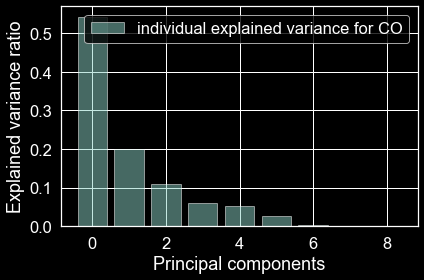

In [143]:
# scree plot
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


with plt.style.context('dark_background'):
    plt.figure(figsize=(6, 4))

    plt.bar(range(9), explained_variance, alpha=0.5, align='center',
            label='individual explained variance for CO')
    plt.ylabel('Explained variance ratio')
    plt.xlabel('Principal components')
    plt.legend(loc='best')
    plt.tight_layout()

In [151]:
# keeping first 5 component for dependent variable CO
pca=PCA(n_components=5)
X_new=pca.fit_transform(X)
X_new

array([[ -1.90104523,  -9.69978879,   4.60681314,  -9.74738744,
         -7.62342871],
       [ -1.67337835, -10.25849148,   4.34056676,  -9.61088305,
         -8.02086016],
       [ -2.10004955, -11.04442769,   4.30028307,  -9.86385665,
         -8.23372233],
       ...,
       [ 51.34432487, -13.96019227,  20.06468065,  -3.45972358,
          6.61616293],
       [  8.59352436, -18.40093564,   8.32957835, -14.52640147,
          0.98727358],
       [ 18.77174239, -17.33859348,  10.97700869, -11.93884409,
          2.73527696]])

In [152]:
pca.get_covariance()

array([[ 5.53911079e+01, -1.95922340e+01, -5.13080010e+01,
         1.46176280e+00,  1.27118030e+00,  2.41576967e+01,
         1.41627533e+01, -1.07941657e+01,  9.74348689e-02],
       [-1.95922340e+01,  4.17697212e+01, -1.42205148e+00,
        -1.95906548e-01,  1.52940682e+00, -5.67501136e-01,
        -1.00285084e+01,  1.18815522e+01,  7.15406569e-01],
       [-5.13080010e+01, -1.42205148e+00,  2.09129242e+02,
        -1.65476756e+00, -1.42850395e+01, -5.62262616e+01,
         2.24363547e+00, -3.10550042e+01, -3.09237250e+00],
       [ 1.46176280e+00, -1.95906548e-01, -1.65476756e+00,
         1.17915220e+00,  2.24953846e+00,  9.30498576e+00,
        -2.37365718e+00,  8.12223022e+00,  5.94005182e-01],
       [ 1.27118030e+00,  1.52940682e+00, -1.42850395e+01,
         2.24953846e+00,  1.76440042e+01,  6.46318042e+01,
        -2.04213665e+01,  6.27540587e+01,  4.43132560e+00],
       [ 2.41576967e+01, -5.67501136e-01, -5.62262616e+01,
         9.30498576e+00,  6.46318042e+01,  3.071668

In [153]:
explained_variance=pca.explained_variance_ratio_
explained_variance

array([0.61693898, 0.23484556, 0.08576285, 0.03726999, 0.02158263])

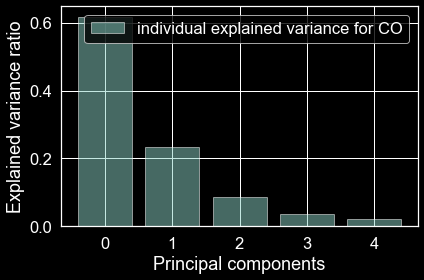

In [154]:
with plt.style.context('dark_background'):
    plt.figure(figsize=(6, 4))

    plt.bar(range(5), explained_variance, alpha=0.5, align='center',
            label='individual explained variance for CO')
    plt.ylabel('Explained variance ratio')
    plt.xlabel('Principal components')
    plt.legend(loc='best')
    plt.tight_layout()

In [155]:
# Establisshing random regressor 

from sklearn.model_selection import train_test_split
X_train, X_test, y_train_CO, y_test_CO = train_test_split(X_new, Y_CO, test_size=0.3, random_state=1)
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor()

# Try different numbers of n_estimators - this will take a minute or so
estimators = np.arange(10, 200, 10)
scores = []
for n in estimators:
    model.set_params(n_estimators=n)
    model.fit(X_train, y_train_CO)
    scores.append(model.score(X_test, y_test_CO))
print(scores) 

[0.6510775027854165, 0.6723264362576566, 0.6834952719100216, 0.687099723824342, 0.6836088052592288, 0.6848146486278561, 0.6814173815623712, 0.6920159489807169, 0.6829500015476435, 0.6938031282453556, 0.6882381172045562, 0.6866034409629451, 0.6934648709963394, 0.6874426528947917, 0.6913055761096342, 0.6922985112947648, 0.6888513071143432, 0.6887508634865348, 0.6868851724252071]


In [159]:
# predict & accuracy check

y_pred_CO = model.predict(X_test)
from sklearn import metrics

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test_CO, y_pred_CO))
print('Mean Squared Error:', metrics.mean_squared_error(y_test_CO, y_pred_CO))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test_CO, y_pred_CO)))
print('R^2:', metrics.r2_score(y_test_CO, y_pred_CO))

Mean Absolute Error: 0.5964715331748973
Mean Squared Error: 1.5308360391368034
Root Mean Squared Error: 1.2372695903224986
R^2: 0.6868851724252071


In [175]:
# Lasso regression
lcv.fit(X_train, y_train_CO)
# Make Prediction
Y_pred_CO = lcv.predict(X_test)

# Return Results
print("The R-square is %0.2f"% lcv.score(X_test, y_test_CO))
print('Lasso Regression MAE: %0.1f'%metrics.mean_absolute_error(y_test_CO,Y_pred_CO))
print('Lasso Regression MSE:%0.1f'%metrics.mean_squared_error(y_test_CO,Y_pred_CO))
print('Lasso Regression RMSE:%0.1f'%np.sqrt(metrics.mean_squared_error(y_test_CO,Y_pred_CO)))
se_lcv = stats.sem(Y_pred_CO)

The R-square is 0.56
Lasso Regression MAE: 0.9
Lasso Regression MSE:2.2
Lasso Regression RMSE:1.5


Text(0.5, 1.0, 'NOX')

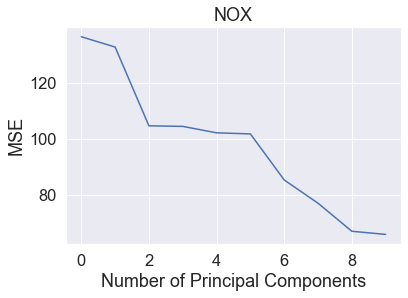

In [161]:
#define predictor and response variables
X = df.drop(columns = ['CO', 'NOX'])
Y_NOX = df[['NOX']]

#scale predictor variables
pca = PCA()
X_reduced = pca.fit_transform(scale(X))

#define cross validation method
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)

regr = LinearRegression()
mse = []

# Calculate MSE with only the intercept
score = -1*model_selection.cross_val_score(regr,
           np.ones((len(X_reduced),1)), Y_NOX, cv=cv,
           scoring='neg_mean_squared_error').mean()    
mse.append(score)

# Calculate MSE using cross-validation, adding one component at a time
for i in np.arange(1, 10):
    score = -1*model_selection.cross_val_score(regr,
               X_reduced[:,:i], Y_NOX, cv=cv, scoring='neg_mean_squared_error').mean()
    mse.append(score)
    
# Plot cross-validation results    
plt.plot(mse)
plt.xlabel('Number of Principal Components')
plt.ylabel('MSE')
plt.title('NOX')

In [162]:
explained_variance_NOX= pca.explained_variance_
explained_variance_NOX

array([4.88189626e+00, 1.79947778e+00, 9.85755796e-01, 5.50202414e-01,
       4.79478826e-01, 2.51080579e-01, 4.03900276e-02, 9.79010253e-03,
       2.17323674e-03])

In [165]:
print(abs( pca.components_ ))

[[2.38022265e-02 4.43141199e-02 1.06820544e-01 3.50938807e-01
  4.41800590e-01 4.09317268e-01 3.22712091e-01 4.41432915e-01
  4.48515930e-01]
 [6.83097315e-01 4.50897653e-01 4.32390168e-01 1.54509538e-01
  1.79895623e-04 1.32932199e-01 3.04672232e-01 8.83505342e-02
  3.05437752e-02]
 [6.38313568e-02 6.86196030e-01 7.02574218e-01 1.47230892e-01
  1.23872444e-02 7.36189184e-02 3.46912827e-02 5.16913048e-02
  1.80120571e-02]
 [1.33486489e-01 4.82377120e-01 3.56850995e-01 2.61952676e-01
  9.23124568e-02 3.72379867e-01 6.36325440e-01 3.77468690e-02
  2.93043120e-03]
 [2.97536643e-01 2.08184310e-01 1.66444783e-01 6.82551139e-01
  1.47588556e-01 3.39358997e-01 4.03694775e-01 2.40656205e-01
  1.29304004e-01]
 [6.34864971e-01 2.14706296e-01 3.88401455e-01 5.39590607e-01
  1.53484035e-01 1.02932879e-02 2.62882128e-01 2.16971795e-03
  1.26723873e-01]
 [2.57426551e-02 3.53920553e-02 4.58845964e-02 7.31378796e-02
  7.79469247e-01 5.12036535e-01 3.39099648e-01 6.46581625e-02
  4.13183047e-02]
 [8.24

In [166]:
component_names = [f"PC{i+1}" for i in range(X_reduced.shape[1])]
X_reduced = pd.DataFrame(X_reduced, columns=component_names)

In [167]:
loadings = pd.DataFrame(
    pca.components_.T,  # transpose the matrix of loadings
    columns=component_names,  # so the columns are the principal components
    index=X.columns,  # and the rows are the original features
)
loadings

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9
AT,0.023802,-0.683097,0.063831,-0.133486,0.297537,-0.634865,-0.025743,-0.082414,-0.109005
AP,0.044314,0.450898,0.686196,-0.482377,0.208184,-0.214706,0.035392,0.009179,-0.019964
AH,-0.106821,0.432390,-0.702574,-0.356851,0.166445,-0.388401,0.045885,0.001398,-0.002836
AFDP,0.350939,-0.154510,-0.147231,-0.261953,0.682551,0.539591,0.073138,-0.016209,-0.005162
GTEP,0.441801,0.000180,-0.012387,0.092312,-0.147589,-0.153484,0.779469,0.378429,-0.004083
TIT,0.409317,-0.132932,-0.073619,-0.372380,-0.339359,0.010293,-0.512037,0.537804,0.063381
TAT,-0.322712,-0.304672,-0.034691,-0.636325,-0.403695,0.262882,0.339100,-0.217765,0.049309
TEY,0.441433,0.088351,-0.051691,-0.037747,-0.240656,-0.002170,-0.064658,-0.477094,-0.709588
CDP,0.448516,0.030544,-0.018012,0.002930,-0.129304,-0.126724,-0.041318,-0.534207,0.691162


In [168]:
pca.get_covariance()

array([[ 1.00002722, -0.40661221, -0.47630387,  0.25198075,  0.04585235,
         0.18371127,  0.28187671, -0.09115432,  0.01528748],
       [-0.40661221,  1.00002722, -0.01518424, -0.04036459,  0.0575348 ,
        -0.00539013, -0.22560691,  0.11822737,  0.10263901],
       [-0.47630387, -0.01518424,  1.00002722, -0.14784451, -0.23515988,
        -0.22181472,  0.02296545, -0.13736345, -0.19627992],
       [ 0.25198075, -0.04036459, -0.14784451,  1.00002722,  0.67850386,
         0.69131039, -0.46689446,  0.66550081,  0.70258717],
       [ 0.04585235,  0.0575348 , -0.23515988,  0.67850386,  1.00002722,
         0.87425797, -0.6997221 ,  0.9641529 ,  0.97849658],
       [ 0.18371127, -0.00539013, -0.22181472,  0.69131039,  0.87425797,
         1.00002722, -0.38087276,  0.91032203,  0.90849415],
       [ 0.28187671, -0.22560691,  0.02296545, -0.46689446, -0.6997221 ,
        -0.38087276,  1.00002722, -0.68241476, -0.70645753],
       [-0.09115432,  0.11822737, -0.13736345,  0.66550081,  0

In [169]:
explained_variance=pca.explained_variance_ratio_
explained_variance

array([5.42418151e-01, 1.99936532e-01, 1.09525440e-01, 6.11319373e-02,
       5.32739748e-02, 2.78970826e-02, 4.48765867e-03, 1.08775956e-03,
       2.41464175e-04])

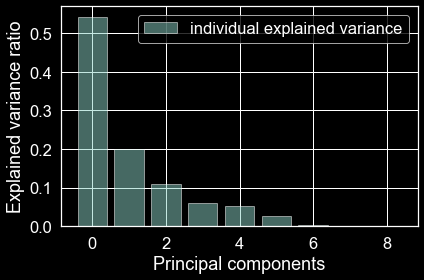

In [173]:
with plt.style.context('dark_background'):
    plt.figure(figsize=(6, 4))

    plt.bar(range(9), explained_variance, alpha=0.5, align='center',
            label='individual explained variance')
    plt.ylabel('Explained variance ratio')
    plt.xlabel('Principal components')
    plt.legend(loc='best')
    plt.tight_layout()

In [171]:
# Establisshing random regressor 

from sklearn.model_selection import train_test_split
X_train, X_test, y_train_NOX, y_test_NOX = train_test_split(X_new, Y_NOX, test_size=0.3, random_state=1)
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor()

# Try different numbers of n_estimators - this will take a minute or so
estimators = np.arange(10, 200, 10)
scores = []
for n in estimators:
    model.set_params(n_estimators=n)
    model.fit(X_train, y_train_NOX)
    scores.append(model.score(X_test, y_test_NOX))
print(scores) 

[0.7199548772925095, 0.7334907612112231, 0.7427572404140051, 0.7427305867758982, 0.7442853143280926, 0.7443644798648761, 0.7478367405035931, 0.747811534736585, 0.7475222954342553, 0.7476043183191587, 0.7469771620452612, 0.7471576703561447, 0.7489056274817663, 0.7485839503019177, 0.74863582241024, 0.748142555427179, 0.7483034791643779, 0.7487517517822443, 0.7478967075259005]


In [172]:
# predict & accuracy check

y_pred_NOX = model.predict(X_test)
from sklearn import metrics

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test_NOX, y_pred_NOX))
print('Mean Squared Error:', metrics.mean_squared_error(y_test_NOX, y_pred_NOX))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test_NOX, y_pred_NOX)))
print('R^2:', metrics.r2_score(y_test_NOX, y_pred_NOX))

Mean Absolute Error: 3.8959680733594424
Mean Squared Error: 34.34700295153982
Root Mean Squared Error: 5.86063161711601
R^2: 0.7478967075259005


In [174]:
# Lasso regression
lcv.fit(X_train, y_train_NOX)
# Make Prediction
Y_pred_NOX = lcv.predict(X_test)

# Return Results
print("The R-square is %0.2f"% lcv.score(X_test, y_test_NOX))
print('Lasso Regression MAE: %0.1f'%metrics.mean_absolute_error(y_test_NOX,Y_pred_NOX))
print('Lasso Regression MSE:%0.1f'%metrics.mean_squared_error(y_test_NOX,Y_pred_NOX))
print('Lasso Regression RMSE:%0.1f'%np.sqrt(metrics.mean_squared_error(y_test_NOX,Y_pred_NOX)))
se_lcv = stats.sem(Y_pred_NOX)

The R-square is 0.33
Lasso Regression MAE: 7.4
Lasso Regression MSE:91.6
Lasso Regression RMSE:9.6
